<a href="https://colab.research.google.com/github/Byron-Leung/Deep-learning/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#this part mount google drive to colab
import os
import tarfile
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'gdrive/My Drive/dataset/train'
test_dir = 'gdrive/My Drive/dataset/test'
vali_dir = 'gdrive/My Drive/dataset/val'
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=45
                                 ,width_shift_range=0.2
                                 ,height_shift_range=0.2,shear_range=0.2

                                 ,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
vali_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20
                                                  ,class_mode="sparse")#return 2D one-hot label
validation_generator=vali_datagen.flow_from_directory(vali_dir,target_size=(299,299),batch_size=20,class_mode="sparse")
test_generator=test_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20,class_mode="sparse")

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import models
from keras import layers
from keras import optimizers

resnet50


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'gdrive/My Drive/dataset/train'
test_dir = 'gdrive/My Drive/dataset/test'
vali_dir = 'gdrive/My Drive/dataset/val'
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=45
                                 ,width_shift_range=0.2
                                 ,height_shift_range=0.2,shear_range=0.2

                                 ,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
vali_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20
                                                  ,class_mode="sparse")#return 2D one-hot label
validation_generator=vali_datagen.flow_from_directory(vali_dir,target_size=(224,224),batch_size=20,class_mode="sparse")
test_generator=test_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode="sparse")
from keras.applications.resnet50 import resnet50
resnetmodel = keras.applications.resnet.ResNet50(include_top=True, weights='imagenet'
                                   , input_tensor=None, input_shape=None #default shape(224,224)
                                   , pooling='avg')
                                                 # , classes=120)
resnetmodel.compile(loss='sparse_categorical_crossentropy',optimizer = optimizers.SGD(),metrics=['accuracy'])
reshistory = resnetmodel.fit_generator(
    train_generator,
    steps_per_epoch=None,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=None)

Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.
Found 16418 images belonging to 120 classes.


NameError: ignored

Vgg16


In [0]:
from keras.applications.vgg16 import vgg16
vggmodel = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet',
                                input_tensor=None, input_shape=None,
                                pooling=None,
                                classes=1000)
vggmodel.compile(loss='sparse_categorical_crossentropy',optimizer = optimizers.SGD(),metrics=['accuracy'])
vggmodel.summary()
vgghistory = vggmodel.fit_generator(
    train_generator,
    steps_per_epoch=None,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=None)

NameError: ignored

xception

In [6]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_dir = 'gdrive/My Drive/dataset/train'
test_dir = 'gdrive/My Drive/dataset/test'
vali_dir = 'gdrive/My Drive/dataset/val'
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=45
                                 ,width_shift_range=0.2
                                 ,height_shift_range=0.2,shear_range=0.2
                                 ,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
vali_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20
                                                  ,class_mode="sparse")#return 2D one-hot label
validation_generator=vali_datagen.flow_from_directory(vali_dir,target_size=(299,299),batch_size=20,class_mode="sparse")
test_generator=test_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20,class_mode="sparse")
from keras.applications.xception import xception
xmodel = keras.applications.xception.Xception(include_top=True, weights='imagenet'
                                              , input_tensor=None, input_shape=None, pooling=None, classes=1000)
##%
xmodel.compile(loss='sparse_categorical_crossentropy',optimizer = optimizers.SGD(),metrics=['accuracy'])
#%%
xhistory = xmodel.fit_generator(
    train_generator,
    steps_per_epoch=None,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=None)

Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.
Found 16418 images belonging to 120 classes.
91889664/91884032 [==============================] - 2s 0us/step
Epoch 1/30
821/821 [==============================] - 6748s 8s/step - loss: 4.8853 - accuracy: 0.0889 - val_loss: 3.2267 - val_accuracy: 0.3683
Epoch 2/30
821/821 [==============================] - 567s 690ms/step - loss: 2.3128 - accuracy: 0.4574 - val_loss: 0.3939 - val_accuracy: 0.7307
Epoch 3/30
821/821 [==============================] - 558s 679ms/step - loss: 1.4807 - accuracy: 0.6121 - val_loss: 0.4232 - val_accuracy: 0.7850
Epoch 4/30
821/821 [==============================] - 556s 678ms/step - loss: 1.1655 - accuracy: 0.6785 - val_loss: 0.2062 - val_accuracy: 0.8104
Epoch 5/30
821/821 [==============================] - 556s 677ms/step - loss: 0.9894 - accuracy: 0.7169 - val_loss: 0.5441 - val_accuracy: 0.8288
Epoch 6/30
821/821 [==============================] - 556s 677ms/step - l

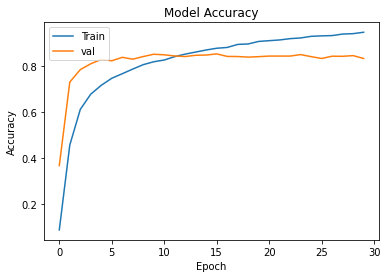

In [7]:
import matplotlib.pyplot as plt

plt.plot(xhistory.history['accuracy'])
plt.plot(xhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

In [0]:
xmodel.save('/content/gdrive/My Drive/xmodel.h5')
xmodel.save_weights('/content/gdrive/My Drive/xmodel_weight.h5')

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_dir = 'gdrive/My Drive/dataset/train'
test_dir = 'gdrive/My Drive/dataset/test'
vali_dir = 'gdrive/My Drive/dataset/val'
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=45
                                 ,width_shift_range=0.2
                                 ,height_shift_range=0.2,shear_range=0.2
                                 ,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1./255)
vali_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20
                                                  ,class_mode="sparse")#return 2D one-hot label
validation_generator=vali_datagen.flow_from_directory(vali_dir,target_size=(299,299),batch_size=20,class_mode="sparse")
test_generator=test_datagen.flow_from_directory(train_dir,target_size=(299,299),batch_size=20,class_mode="sparse")
from keras.applications.xception import xception
sgdn = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)#with nesterov as optimizer

xmodel_1 = keras.applications.xception.Xception(include_top=True, weights='imagenet'
                                              , input_tensor=None, input_shape=None, pooling=None, classes=1000)
##%
xmodel_1.compile(loss='sparse_categorical_crossentropy',optimizer = sgdn,metrics=['accuracy'])
#%%
xhistory_1 = xmodel_1.fit_generator(
    train_generator,
    steps_per_epoch=None,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=None)

Using TensorFlow backend.


Found 16418 images belonging to 120 classes.
Found 2009 images belonging to 120 classes.
Found 16418 images belonging to 120 classes.
91889664/91884032 [==============================] - 3s 0us/step
Epoch 1/30
821/821 [==============================] - 5899s 7s/step - loss: 3.4465 - accuracy: 0.3088 - val_loss: 1.6893 - val_accuracy: 0.6332
Epoch 2/30
821/821 [==============================] - 583s 711ms/step - loss: 1.2454 - accuracy: 0.6300 - val_loss: 0.5855 - val_accuracy: 0.6690
Epoch 3/30
821/821 [==============================] - 565s 688ms/step - loss: 0.9779 - accuracy: 0.7075 - val_loss: 0.3325 - val_accuracy: 0.7302
Epoch 4/30
821/821 [==============================] - 561s 683ms/step - loss: 0.8180 - accuracy: 0.7459 - val_loss: 1.6155 - val_accuracy: 0.7138
Epoch 5/30
821/821 [==============================] - 558s 679ms/step - loss: 0.6912 - accuracy: 0.7847 - val_loss: 0.3043 - val_accuracy: 0.7312
Epoch 6/30
821/821 [==============================] - 558s 680ms/step - l

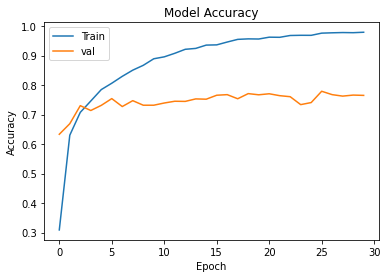

In [4]:
import matplotlib.pyplot as plt

plt.plot(xhistory_1.history['accuracy'])
plt.plot(xhistory_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc='upper left')
plt.show()

In [0]:
xmodel_1.save('/content/gdrive/My Drive/xmodel_1.h5')
xmodel_1.save_weights('/content/gdrive/My Drive/xmodel_1_weight.h5')

In [0]:
from keras.models import load_model
xmodel_1 = load_model('/content/gdrive/My Drive/xmodel_1.h5')

In [7]:
xmodel_1.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________